Epoch 1/100
1/1 [==============================] - 10s 10s/step - loss: 0.6547 - val_loss: 0.7857
Epoch 2/100
1/1 [==============================] - 0s 148ms/step - loss: 0.5543 - val_loss: 0.6608
Epoch 3/100
1/1 [==============================] - 0s 143ms/step - loss: 0.4594 - val_loss: 0.5386
Epoch 4/100
1/1 [==============================] - 0s 143ms/step - loss: 0.3673 - val_loss: 0.4161
Epoch 5/100
1/1 [==============================] - 0s 145ms/step - loss: 0.2761 - val_loss: 0.2937
Epoch 6/100
1/1 [==============================] - 0s 160ms/step - loss: 0.1866 - val_loss: 0.1758
Epoch 7/100
1/1 [==============================] - 0s 140ms/step - loss: 0.1032 - val_loss: 0.0733
Epoch 8/100
1/1 [==============================] - 0s 99ms/step - loss: 0.0358 - val_loss: 0.0084
Epoch 9/100
1/1 [==============================] - 0s 106ms/step - loss: 0.0036 - val_loss: 0.0115
Epoch 10/100
1/1 [==============================] - 0s 100ms/step - loss: 0.0313 - val_loss: 0.0517
Epoch 11/10

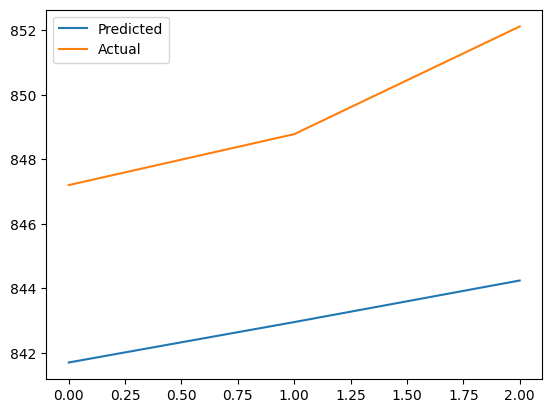

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('goog.csv')

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Define sequence length
sequence_length = 50

# Generate sequences
sequences = []
for i in range(len(scaled_data) - sequence_length):
    sequences.append(scaled_data[i:i + sequence_length + 1])

# Convert sequences to numpy array
sequences = np.array(sequences)

# Split data into input and output
X = sequences[:, :-1]
y = sequences[:, -1]

# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define RNN model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions
predictions = scaler.inverse_transform(predictions)

# Calculate evaluation metrics
mae = mean_absolute_error(scaler.inverse_transform(y_test), predictions)
mse = mean_squared_error(scaler.inverse_transform(y_test), predictions)
rmse = np.sqrt(mse)
r2 = r2_score(scaler.inverse_transform(y_test), predictions)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

# Visualize the results
plt.plot(predictions, label='Predicted')
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.legend()
plt.show()
